# Solving the Traveling Salesman Problem using Self-Organized Maps (SOMs)
The traveling salesman problem (TSP) has been studied since the 18th century by mathematicians [1]. Given a set of cities and the distances between each possible pairs, the goal is to find the best way to visit all cities and return to the starting point, while minimizing the travel distance [1]. This problem has many real-world applications, such as school bus routing, crew scheduling, and order-picking in warehouses [1]. Since this problem has been so widely studied, there are many different approaches to solve the TSP, such as a brute-force approach, nearest neighbor method, etc. In this study, a self-organizing map (SOM) will be used to solve the TSP problem.
## Methods
SOMs are a type of neural network that uses competitive learning to produce a low dimensional representation of high dimensional data while preserving similairty relationships between the data [2]. Most SOMs follow a three-step process for self organization. In the first step, competitive process, an input pattern vector is presented to the map and all neurons calculate values of a discriminant function [2]. The neuron closest to the input vector is called the best matching unit (BMU) [2]. In the cooperative process, the BMU finds the spatial location of a neighborhood of excited neurons and then neurons from this neighborhood can cooperate [2]. In synaptic adaption, the excited neurons modify their values of the discriminant function using weight adjustments to move them closer or further away from the input pattern vector [2]. The basic process for SOMs is shown in the flow chart below. In this study, the SOM approach will be applied to the TSP problem using different starting points and neighborhood values.
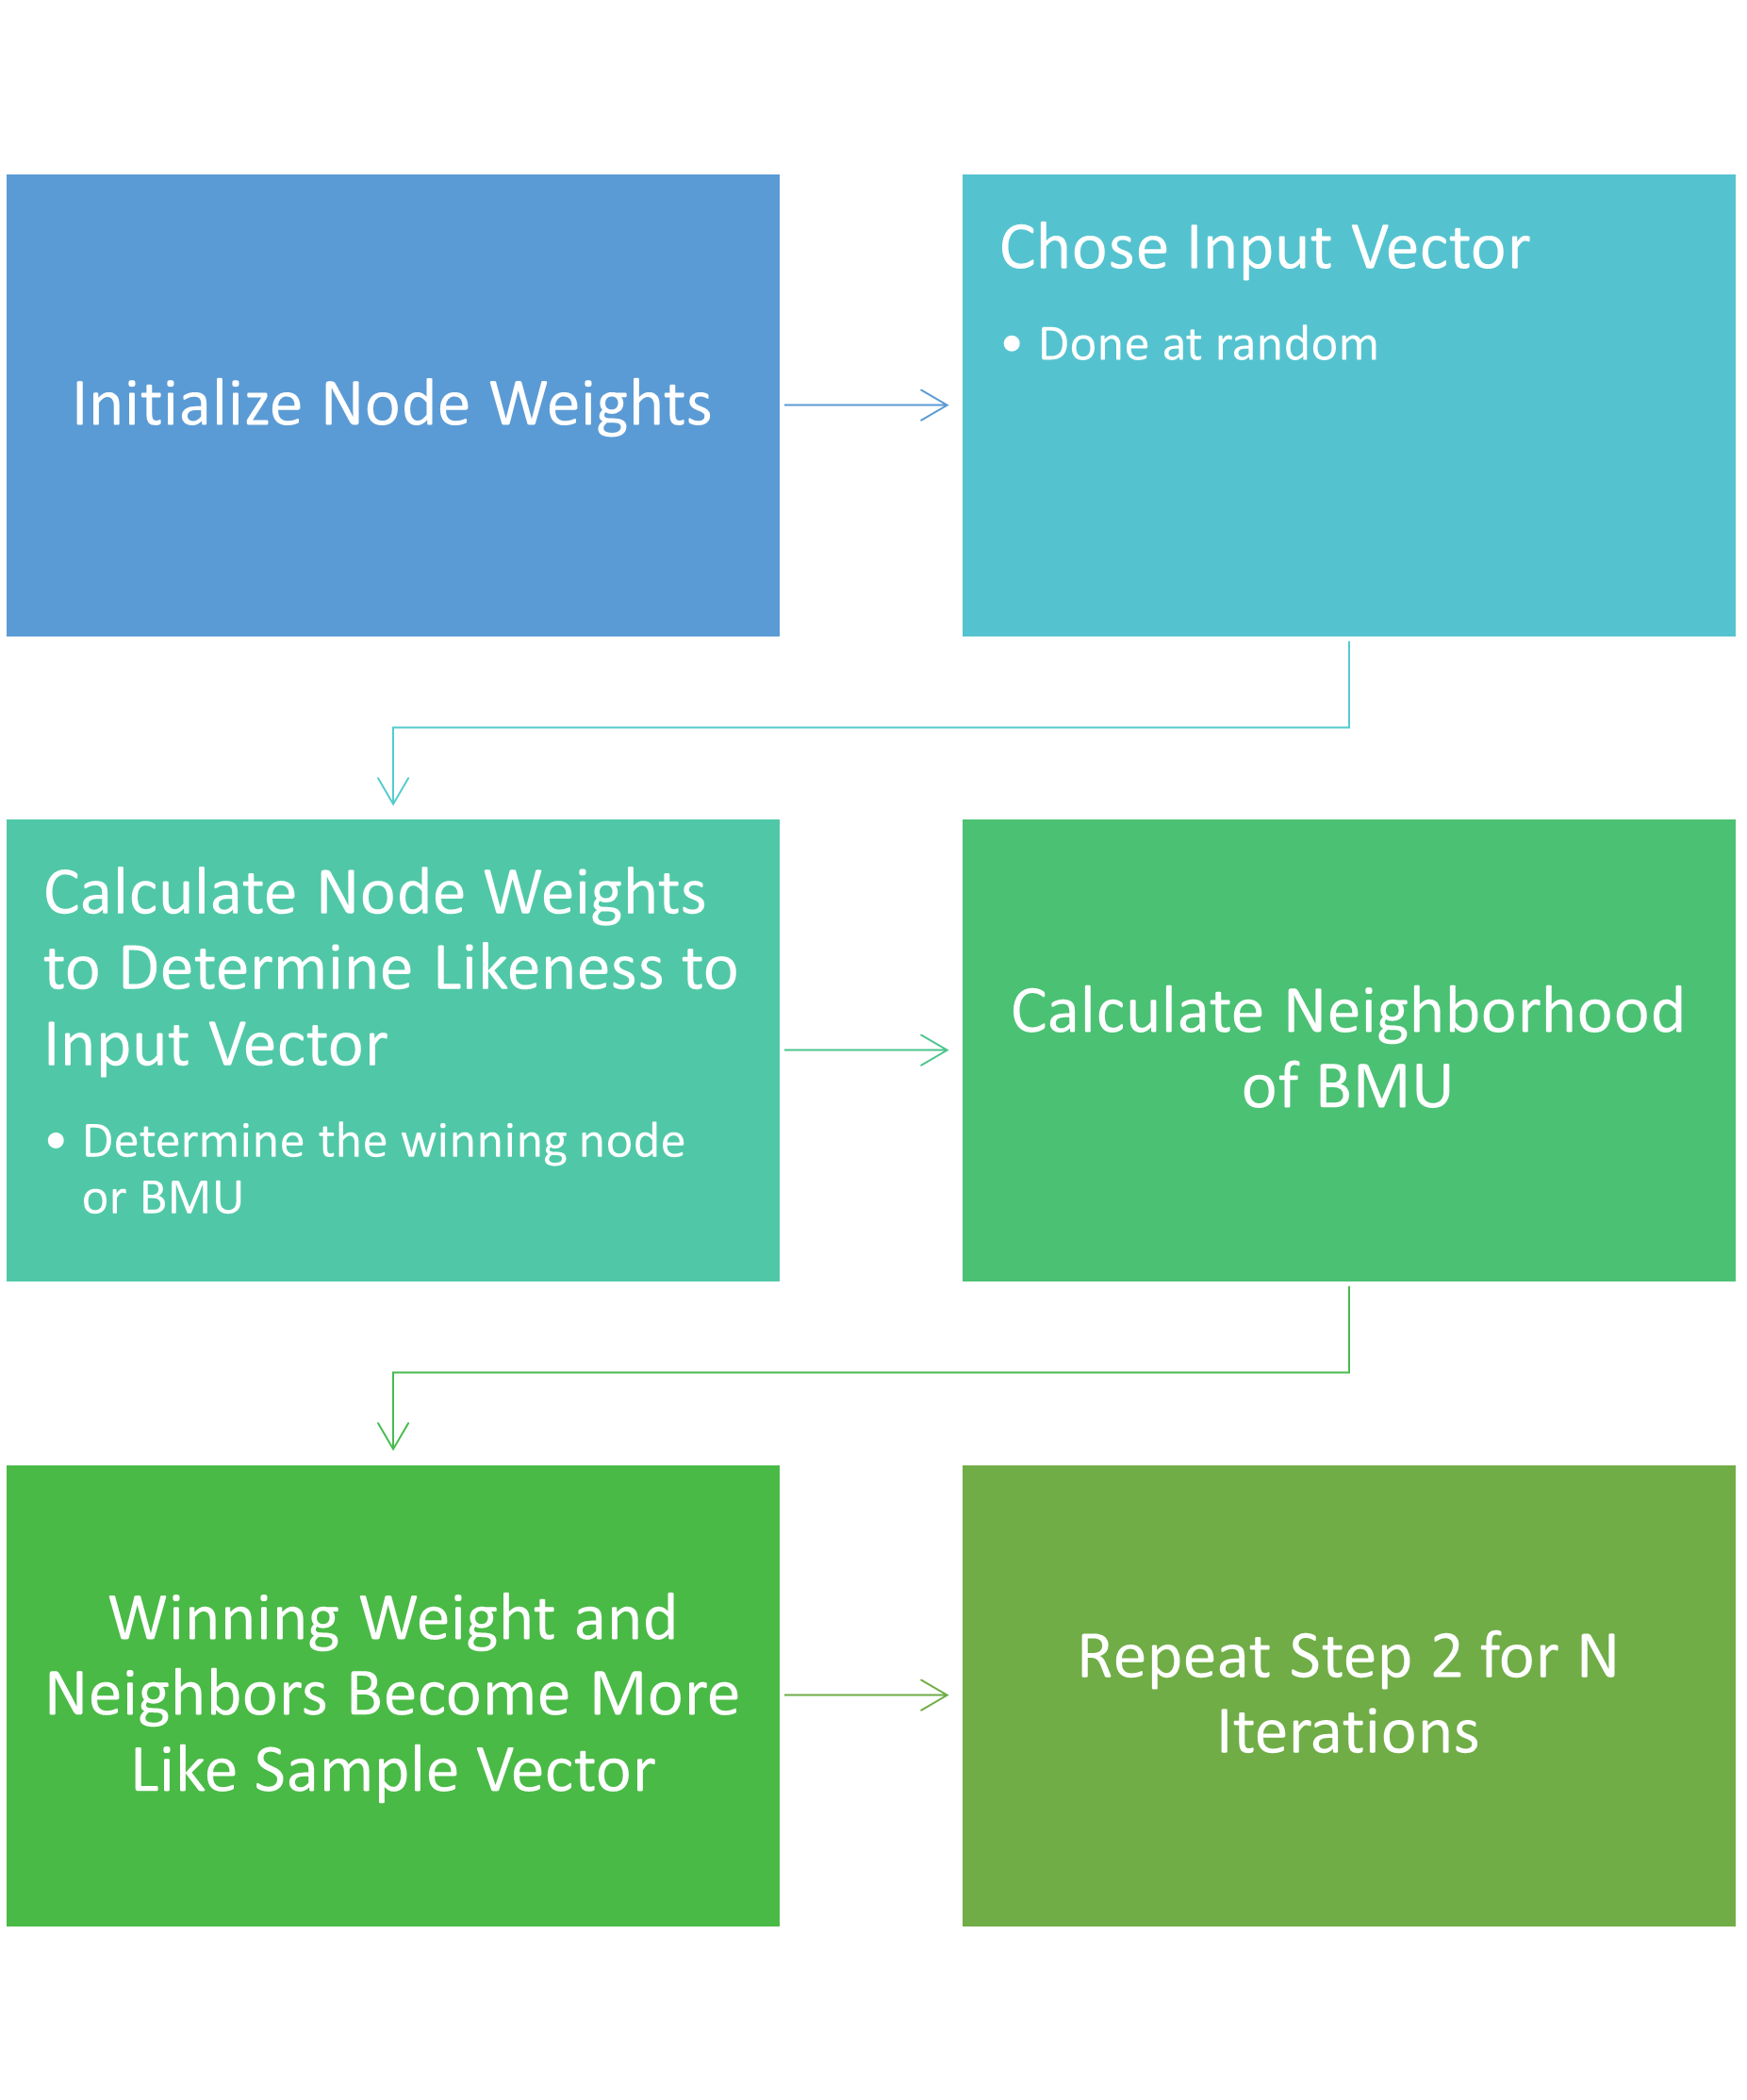

### +/- 2 Neighbor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create data points
x= np.array([[0.98,0.15],
            [0.17,0.38],
            [0.25,0.16],
            [0.39,0.75],
            [0.07,0.87],
            [0.68,0.35],
            [0.42, 0.68],
            [0.98,0.29],
            [0.40,0.53],
            [0.62,0.83]])

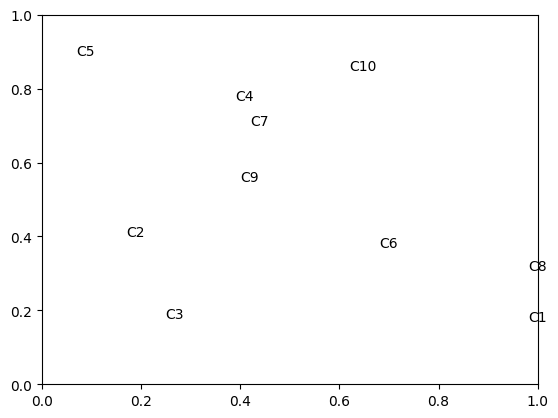

In [ ]:
#add labels
for i in range (len(x)):
  plt.text(x[i,0], x[i,1]+0.02, f'C{i+1}')

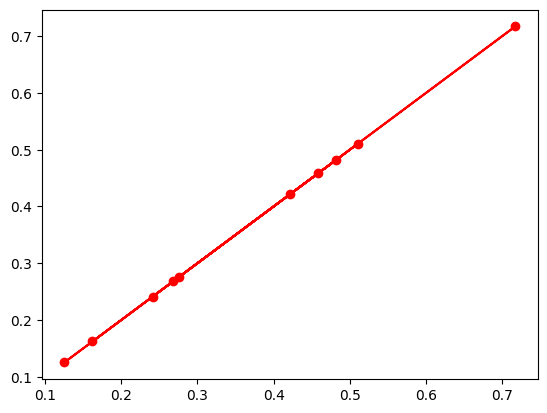

In [ ]:
#initilize weight vectors for neighborhood (+-2)

w= np.random.rand(10,2)
alpha= 0.05
k=0
diff= 10

if diff > 0.1:
    old_w= w.copy()
    k += 1

    #shuffle order
    order= np.random.permutation(10)

    for i in range (10):
      d= np.sqrt(np.sum(((np.ones((10,1))* x[order[i],:]) - w)**2, axis=1))
      m1, m2= np.min(d), np.argmin(d)

      if m2 == 0:
        w[0,:]+= alpha * (x[order[i],:]-w[0,:])
        w[1,:]+= alpha * (x[order[i],:]-w[1,:])
        w[2,:]+= alpha * (x[order[i],:]-w[2,:])
        w[9,:]+= alpha * (x[order[i],:]-w[9,:])
        w[-1,:]+= alpha * (x[order[i],:]-w[-1,:])
      elif m2 == 1:
        w[0,:]+= alpha * (x[order[i],:]-w[0,:])
        w[1,:]+= alpha * (x[order[i],:]-w[1,:])
        w[2,:]+= alpha * (x[order[i],:]-w[2,:])
        w[3,:]+= alpha * (x[order[i],:]-w[3,:])
        w[-1,:]+= alpha * (x[order[i],:]-w[-1,:])
      elif m2 == 8:
        w[6,:]+= alpha * (x[order[i],:]-w[6,:])
        w[7,:]+= alpha * (x[order[i],:]-w[7,:])
        w[8,:]+= alpha * (x[order[i],:]-w[8,:])
        w[-1,:]+= alpha * (x[order[i],:]-w[-1,:])
        w[0,:]+= alpha * (x[order[i],:]-w[0,:])
      elif m2 == 9:
        w[7,:]+= alpha * (x[order[i],:]-w[7,:])
        w[8,:]+= alpha * (x[order[i],:]-w[8,:])
        w[-1,:]+= alpha * (x[order[i],:]-w[-1,:])
        w[0,:]+= alpha * (x[order[i],:]-w[0,:])
        w[1,:]+= alpha * (x[order[i],:]-w[1,:])
      else:
        for d1 in range(m2-2, m2+3):
          w[d1,:] += alpha * (x[order[i],:] - w[d1,:])


    diff==np.linalg.norm(old_w-w)

    plt.plot(w[:,1],w[:,1],'r')
    plt.plot(w[:,1],w[:,1],'ro')


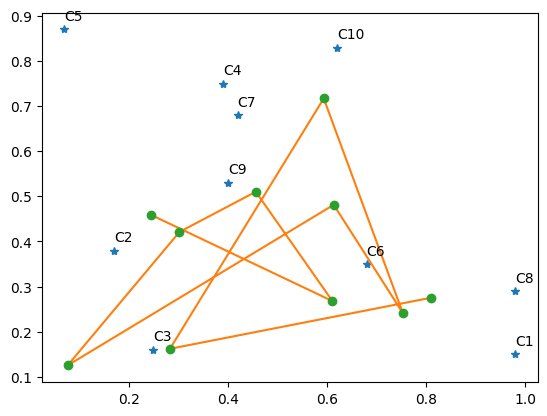

In [ ]:
#Plot final weight vectors
plt.figure()
plt.plot(x[:,0], x[:,1], '*')
plt.axis=([0,1,0,1])

for i in range(len(x)):
  plt.text(x[i,0], x[i,1]+0.02, f'C{i+1}')

plt.plot(w[:,0], w[:,1])
plt.plot(w[:,0], w[:,1], 'o')
plt.show()

### Neighborhood +/-2 with Different Starting Point

In [ ]:
#Create data points/ change the starting point
import numpy as np
import matplotlib.pyplot as plt

#Create data points
x= np.array([[0.17,0.38],
            [0.98,0.15],
            [0.25,0.16],
            [0.39,0.75],
            [0.07,0.87],
            [0.68,0.35],
            [0.42, 0.68],
            [0.98,0.29],
            [0.40,0.53],
            [0.62,0.83]])

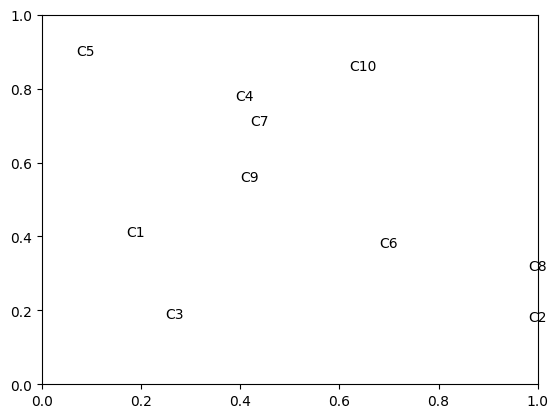

In [ ]:
#add labels
for i in range (len(x)):
  plt.text(x[i,0], x[i,1]+0.02, f'C{i+1}')


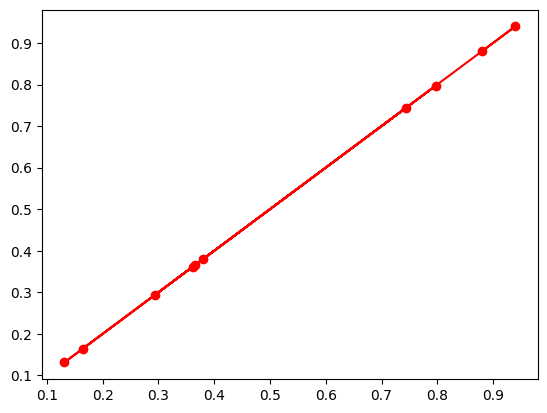

In [ ]:
#initilize weight vectors for neighborhood (+-2)

w= np.random.rand(10,2)
alpha= 0.05
k=0
diff= 10

if diff > 0.1:
    old_w= w.copy()
    k += 0

    #shuffle order
    order= np.random.permutation(10)

    for i in range (10):
      d= np.sqrt(np.sum(((np.ones((10,1))* x[order[i],:]) - w)**2, axis=1))
      m1, m2= np.min(d), np.argmin(d)

      if m2 == 0:
        w[0,:]+= alpha * (x[order[i],:]-w[0,:])
        w[1,:]+= alpha * (x[order[i],:]-w[1,:])
        w[2,:]+= alpha * (x[order[i],:]-w[2,:])
        w[9,:]+= alpha * (x[order[i],:]-w[9,:])
        w[-1,:]+= alpha * (x[order[i],:]-w[-1,:])
      elif m2 == 1:
        w[0,:]+= alpha * (x[order[i],:]-w[0,:])
        w[1,:]+= alpha * (x[order[i],:]-w[1,:])
        w[2,:]+= alpha * (x[order[i],:]-w[2,:])
        w[3,:]+= alpha * (x[order[i],:]-w[3,:])
        w[-1,:]+= alpha * (x[order[i],:]-w[-1,:])
      elif m2 == 8:
        w[6,:]+= alpha * (x[order[i],:]-w[6,:])
        w[7,:]+= alpha * (x[order[i],:]-w[7,:])
        w[8,:]+= alpha * (x[order[i],:]-w[8,:])
        w[-1,:]+= alpha * (x[order[i],:]-w[-1,:])
        w[0,:]+= alpha * (x[order[i],:]-w[0,:])
      elif m2 == 9:
        w[7,:]+= alpha * (x[order[i],:]-w[7,:])
        w[8,:]+= alpha * (x[order[i],:]-w[8,:])
        w[-1,:]+= alpha * (x[order[i],:]-w[-1,:])
        w[0,:]+= alpha * (x[order[i],:]-w[0,:])
        w[1,:]+= alpha * (x[order[i],:]-w[1,:])
      else:
        for d1 in range(m2-2, m2+3):
          w[d1,:] += alpha * (x[order[i],:] - w[d1,:])


    diff==np.linalg.norm(old_w-w)

    plt.plot(w[:,1],w[:,1],'r')
    plt.plot(w[:,1],w[:,1],'ro')

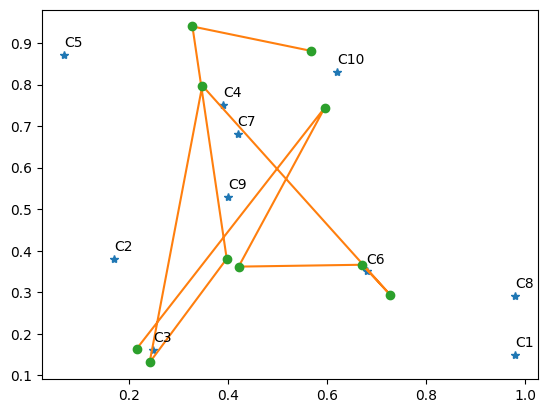

In [ ]:
#Plot final weight vectors
plt.figure()
plt.plot(x[:,0], x[:,1], '*')
plt.axis=([0,1,0,1])

for i in range(len(x)):
  plt.text(x[i,0], x[i,1]+0.02, f'C{i+1}')

plt.plot(w[:,0], w[:,1])
plt.plot(w[:,0], w[:,1], 'o')
plt.show()

### Change Starting Point with +/- 2 Neighbors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create data points
x= np.array([[0.98,0.29],
            [0.98,0.15],
            [0.17,0.38],
            [0.25,0.16],
            [0.39,0.75],
            [0.07,0.87],
            [0.68,0.35],
            [0.42, 0.68],
            [0.40,0.53],
            [0.62,0.83]])

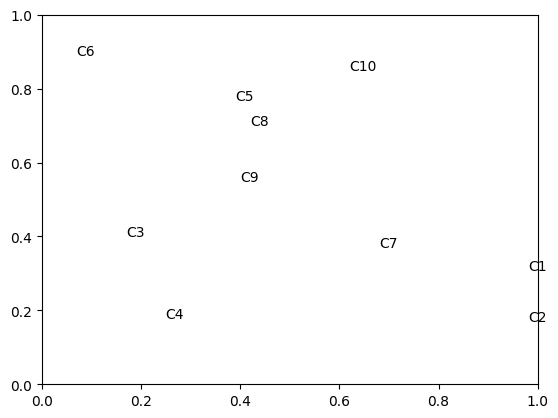

In [ ]:
#add labels
for i in range (len(x)):
  plt.text(x[i,0], x[i,1]+0.02, f'C{i+1}')


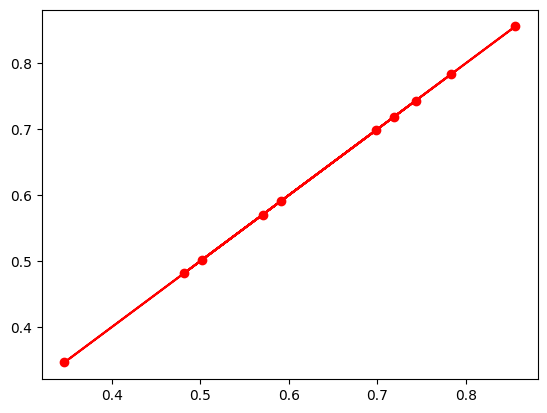

In [ ]:
#initilize weight vectors for neighborhood (+-2)

w= np.random.rand(10,2)
alpha= 0.05
k=0
diff= 10

if diff > 0.1:
    old_w= w.copy()
    k += 1

    #shuffle order
    order= np.random.permutation(10)

    for i in range (10):
      d= np.sqrt(np.sum(((np.ones((10,1))* x[order[i],:]) - w)**2, axis=1))
      m1, m2= np.min(d), np.argmin(d)

      if m2 == 0:
        w[0,:]+= alpha * (x[order[i],:]-w[0,:])
        w[1,:]+= alpha * (x[order[i],:]-w[1,:])
        w[2,:]+= alpha * (x[order[i],:]-w[2,:])
        w[9,:]+= alpha * (x[order[i],:]-w[9,:])
        w[-1,:]+= alpha * (x[order[i],:]-w[-1,:])
      elif m2 == 1:
        w[0,:]+= alpha * (x[order[i],:]-w[0,:])
        w[1,:]+= alpha * (x[order[i],:]-w[1,:])
        w[2,:]+= alpha * (x[order[i],:]-w[2,:])
        w[3,:]+= alpha * (x[order[i],:]-w[3,:])
        w[-1,:]+= alpha * (x[order[i],:]-w[-1,:])
      elif m2 == 8:
        w[6,:]+= alpha * (x[order[i],:]-w[6,:])
        w[7,:]+= alpha * (x[order[i],:]-w[7,:])
        w[8,:]+= alpha * (x[order[i],:]-w[8,:])
        w[-1,:]+= alpha * (x[order[i],:]-w[-1,:])
        w[0,:]+= alpha * (x[order[i],:]-w[0,:])
      elif m2 == 9:
        w[7,:]+= alpha * (x[order[i],:]-w[7,:])
        w[8,:]+= alpha * (x[order[i],:]-w[8,:])
        w[-1,:]+= alpha * (x[order[i],:]-w[-1,:])
        w[0,:]+= alpha * (x[order[i],:]-w[0,:])
        w[1,:]+= alpha * (x[order[i],:]-w[1,:])
      else:
        for d1 in range(m2-2, m2+3):
          w[d1,:] += alpha * (x[order[i],:] - w[d1,:])


    diff==np.linalg.norm(old_w-w)

    plt.plot(w[:,1],w[:,1],'r')
    plt.plot(w[:,1],w[:,1],'ro')

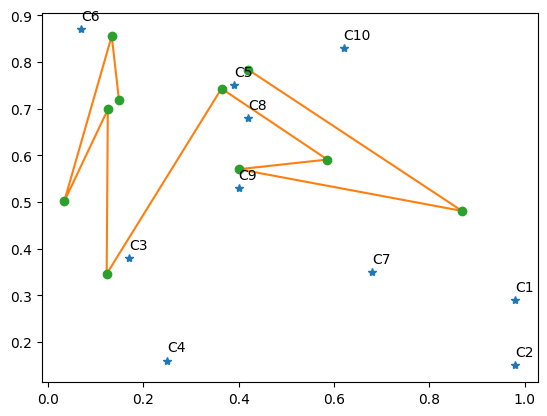

In [ ]:
#Plot final weight vectors
plt.figure()
plt.plot(x[:,0], x[:,1], '*')
plt.axis=([0,1,0,1])

for i in range(len(x)):
  plt.text(x[i,0], x[i,1]+0.02, f'C{i+1}')

plt.plot(w[:,0], w[:,1])
plt.plot(w[:,0], w[:,1], 'o')
plt.show()

## Results
In this study, 3 different starting points were used for the salesman's route. The graphs for each set of points are shown above with the proposed route for the salesman to travel. The first two approaches have overlaps between the different points, which adds extra distance to the routes. The last route goes point to point and minimizes the distance traveled.
## Discussion and Conclusions
Based on the graphs from the different starting points, the third graph with the starting point being (0.98,0.29) seems to be the most ideal of the 3 as it goes point to point without much overlap, unlike the other routes. Different neighborhood values were not used in this report, as I found it difficult figuring out to implent these. Looking at the results of the different routes, it appears that none of this routes are truly a good example of the TSP problem, as they do not start and end in the same spot. An additional distance would need to be added to account for traveling to this last point. Based on this, it appears the SOMs used in this study are not that effect and may need to be tailored more to match the winning BMUs. This code would need to be tweaked before implementing anymore research on this dataset in regards to new routes. In doing this study, I had difficulties trying to tweak the weights of the different nodes without using packages like minisom, which are made for this type of algorithm. Overall, the third route appears to have the lowest amount of distance traveled and therefore the best one, but none of the 3 routes are truly a solution to this problem.
## References
[1] Matai, R., Singh, S., & Mittal, M. L. (2010, December 30). Traveling salesman problem: An overview of applications, formulations, and solution approaches. IntechOpen. https://www.intechopen.com/chapters/12736
[2] Miljkovic, D. (2017, July 13). Brief review of self-organizing maps | IEEE conference publication | IEEE Xplore. IEEE Xplore. https://ieeexplore.ieee.org/document/7973581/


